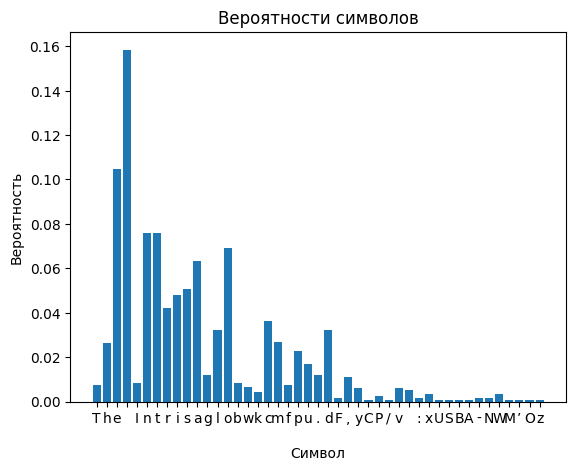

Энтропия файла на английском языке: 4.338


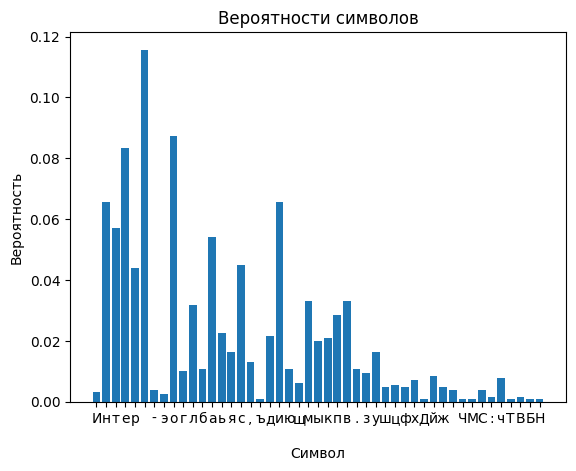

Энтропия файла на русском языке: 4.640
Энтропия бинарного файла: 1.000



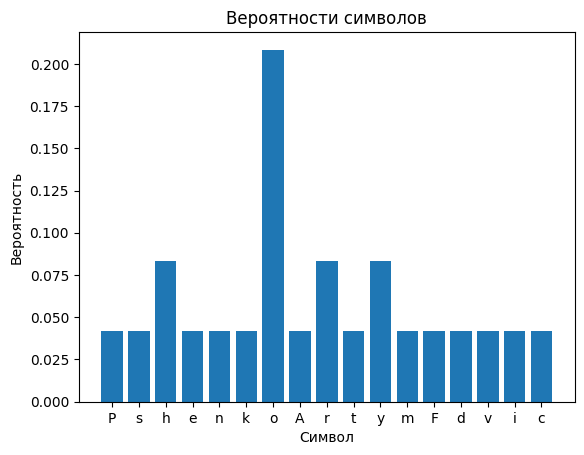

Количество информации в файле на английском (ФИО) (p=0): 92.42945954287094
Количество информации в бинарном файле ASCII (ФИО) (p=0): 168

Количество информации в файле на английском (ФИО) (p=0.1): 81.1735652967282
Количество информации в бинарном файле ASCII (ФИО) (p=0.1): 0.1: 89.20874027700076

Количество информации в файле на английском (ФИО) (p=0.5): 68.42945954287094
Количество информации в бинарном файле ASCII (ФИО) (p=0.5): 0.5: 0.0

Количество информации в файле на английском (ФИО) (p=1.0): 0
Количество информации в бинарном файле ASCII (ФИО) (p=1.0): 1.0: 168



In [47]:
import collections
import math
import matplotlib.pyplot as plt

#========================ПОСТРОЕНИЕ ГИСТОГРАММЫ=================================
def draw_hist(probabilities):
    plt.bar(probabilities.keys(), probabilities.values())
    plt.xlabel("Символ")
    plt.ylabel("Вероятность")
    plt.title("Вероятности символов")
    plt.show()


#==========================РАСЧЕТ ЭНТРОПИИ======================================
histograms = {}
def calculate_entropy(file_name):
  with open(file_name, 'r') as f:
    if is_binary(file_name):
      return 1
    else:
      text = f.read()
      #словарь вида "символ - количество"
      symbol_counts = collections.Counter(text)
      #print(symbol_counts, '\n')

      total_symbols = len(text)

      #словарь вида "символ - его вероятность"
      probabilities = {symbol: count / total_symbols for symbol, count in symbol_counts.items()}
      #print(probabilities)

      if file_name not in histograms:
          draw_hist(probabilities)
          histograms[file_name] = probabilities

      entropy = -sum(p * math.log2(p) for p in probabilities.values()) # ф-ла 2.1
      return entropy



#Для английского файла
print(f"Энтропия файла на английском языке: {calculate_entropy('./eng.txt'):.3f}")

#Для русского файла
print(f"Энтропия файла на русском языке: {calculate_entropy('./rus.txt'):.3f}")

#Для бинарного файла
print(f"Энтропия бинарного файла: {calculate_entropy('./bin.txt'):.3f}\n")




#=====================РАСЧЕТ КОЛ-ВА ИНФОРМАЦИИ==================================
def is_binary(file_path):
    return all(c in '01\n' for c in open(file_path).read())


def info_amount(file):
    try:
      with open(file, 'r') as f:
        text = f.read()
      return calculate_entropy(file) * len(text) # ф-ла 2.3
    except FileNotFoundError:
      return None

print(f"Количество информации в файле на английском (ФИО) (p=0): {info_amount('./me.txt')}")
print(f"Количество информации в бинарном файле ASCII (ФИО) (p=0): {info_amount('./meASCII.txt')}\n")



#===================РАСЧЕТ КОЛ-ВА ИНФОРМАЦИИ C УЧЕТОМ ОШИБОК====================
def effective_entropy(file, p):
    q = 1 - p
    if is_binary(file) and (p == 0 or q == 0):
        return 1
    elif not is_binary(file):
       if(p==1):
        return 0
       else:
        return calculate_entropy(file) - (- p * math.log2(p) - q * math.log2(q))
    return 1 - (- p * math.log2(p) - q * math.log2(q))


def info_amount_with_errors(file, p):
    try:
      with open(file, 'r') as f:
        text = f.read()
      return effective_entropy(file, p)*len(text) #calculate_entropy(file)*
    except FileNotFoundError:
      return None

error_probabilities = [0.1, 0.5, 1.0]
for error_probability in error_probabilities:
    print(f"Количество информации в файле на английском (ФИО) (p={error_probability}): {info_amount_with_errors('./me.txt', error_probability)}")
    print(f"Количество информации в бинарном файле ASCII (ФИО) (p={error_probability}): {error_probability}: {info_amount_with_errors('./meASCII.txt', error_probability)}\n")

